In [11]:
import psycopg2 as pg
import pandas.io.sql as psql

import numpy as np

In [12]:
# get connected to the database
connection = pg.connect("dbname=chiron_test user=postgres")

In [14]:
psql.read_sql("SELECT table_name FROM information_schema.tables", connection);

#### Helper

Le commesse (c_project) sono l'anagrafica produzione per un cliente (c_bpartner). Ogni riga (matricola) è l'ordine che un cliente fa.

Ciò che viene prodotto (m_product) è descritto dalla matricola (m_product), dove trovi quantità e date stimate di produzione.

Per ogni prodotto, sono descritte le fasi di lavorazione (c_projectphase) e tempi di lavorazione (c_projectline_id).

Per ogni fase di lavorazione, sono descritte le ore impiegati dagli operatori ( c_project_usertime). In particolare vedi : totalhour, extrahour, mc_setuphour.

I tempi sono divisi per fasi e per matricole



### Taking a look to the tables

Create dataframes for each suggested table, for a first look


In [15]:
dfCommesse = psql.read_sql("SELECT * FROM adempiere.c_project", connection)
len(np.unique(dfCommesse[['c_project_id']].values))

349

In [18]:
dfClienti = psql.read_sql("SELECT * FROM adempiere.c_bpartner", connection)
len(np.unique(dfClienti[['c_bpartner_id']].values))

# IL cliente è c_bpartner_id || ad_client_id ??

32

In [19]:
dfMatricole = psql.read_sql("SELECT * FROM adempiere.c_projectline", connection)
len(np.unique(dfMatricole[['c_projectline_id']].values))

660

In [22]:
dfProdotti = psql.read_sql("SELECT * FROM adempiere.m_product", connection)
len(np.unique(dfProdotti[['m_product_id']].values))

# 2 prodotti :  cos'è un prodotto: una riga di m_product o una riga di c_projectline (matricola)? 

1

In [21]:
dfFasiLavorazione = psql.read_sql("SELECT * FROM adempiere.c_projectphase", connection)
len(np.unique(dfFasiLavorazione[['c_project_id']].values))


346

In [29]:
dfTempiLavorazione = psql.read_sql("SELECT * FROM adempiere.c_project_usertime", connection)
len(np.unique(dfTempiLavorazione[['c_project_usertime_id']].values))

46316

### Describe tables

In [23]:
dfFasiLavorazione.corr()

,c_project_id,ad_client_id,ad_org_id,createdby,updatedby,priceactual,c_phase_id,c_projectphase_id,qty,seqno,...,c_projectline_id,mc_nome_fase_id,mc_num_dischi2,mc_radiale_avv,mc_nrconduttori,mc_nravvolgimenti,line,mc_ore_prev,costo_ordine,c_phase_type_id
c_project_id,1.000000,NaN,0.020694,-0.179581,0.025261,NaN,NaN,0.977437,NaN,-0.470967,...,0.760237,0.021152,0.073820,-0.088301,-0.041493,-0.158933,0.422577,-0.289843,-0.259335,NaN
ad_client_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ad_org_id,0.020694,NaN,1.000000,0.052762,0.086859,NaN,NaN,0.017308,NaN,-0.049908,...,0.097913,-0.000230,NaN,NaN,NaN,NaN,0.006124,NaN,NaN,NaN
createdby,-0.179581,NaN,0.052762,1.000000,0.426971,NaN,NaN,-0.163659,NaN,0.061507,...,-0.035889,0.052758,0.105051,-0.012051,NaN,0.026412,-0.093328,0.022883,0.032089,NaN
updatedby,0.025261,NaN,0.086859,0.426971,1.000000,NaN,NaN,0.031910,NaN,-0.068343,...,0.245636,0.086860,-0.085976,-0.008802,-0.000694,0.034190,0.091119,-0.016781,-0.004616,NaN
priceactual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
c_phase_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
c_projectphase_id,0.977437,NaN,0.017308,-0.163659,0.031910,NaN,NaN,1.000000,NaN,-0.453261,...,0.771665,0.002551,0.031567,-0.079533,0.011094,-0.187149,0.423071,-0.255739,-0.223936,NaN
qty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seqno,-0.470967,NaN,-0.049908,0.061507,-0.068343,NaN,NaN,-0.453261,NaN,1.000000,...,-0.420022,0.004827,0.051599,0.001532,0.105791,-0.056285,-0.262553,0.012330,0.060934,NaN


In [36]:
dfMatricole

,c_projectline_id,ad_client_id,ad_org_id,isactive,created,createdby,updated,updatedby,c_project_id,line,...,mc_tipomacchina,mc_numordine,previsionamt,startdate,enddate,color,committedprice,mastercategory,rfid,salpercentage
0,1002998.0,1000038.0,1000043.0,Y,2018-10-22 14:44:41,1000853.0,2018-11-12 10:58:56,1000853.0,1000443.0,20.0,...,P,None,0.00,NaT,NaT,None,None,None,None,0.0
1,1002999.0,1000038.0,1000043.0,Y,2018-10-22 14:44:42,1000853.0,2018-11-12 10:59:08,1000853.0,1000443.0,30.0,...,P,None,0.00,NaT,NaT,None,None,None,None,0.0
2,1002402.0,1000038.0,1000043.0,N,2016-06-20 15:11:30,1000853.0,2017-05-12 12:30:52,1000853.0,1000116.0,10.0,...,P,9550058918,17217.04,NaT,NaT,None,None,None,None,0.0
3,1002275.0,1000038.0,1000043.0,N,2016-05-04 14:29:03,1000853.0,2016-06-09 09:27:39,1000853.0,1000099.0,10.0,...,P,BT976896,8819.88,2016-05-05,2016-05-05 23:59:00,None,None,None,None,0.0
4,1002952.0,1000038.0,1000043.0,N,2018-07-24 14:42:09,1000893.0,2018-11-19 12:49:59,1000853.0,1000425.0,10.0,...,P,9550093588,0.00,NaT,NaT,None,None,None,None,0.0
5,1002772.0,1000038.0,1000043.0,N,2018-01-15 16:22:38,1000893.0,2018-04-09 16:09:10,1000853.0,1000355.0,10.0,...,P,BT983977,9341.60,NaT,NaT,None,None,None,None,0.0
6,1002778.0,1000038.0,1000043.0,N,2018-01-22 15:28:28,1000893.0,2018-03-05 11:47:59,1000853.0,1000359.0,10.0,...,P,4500789871,1.00,NaT,NaT,None,None,None,None,0.0
7,1002953.0,1000038.0,1000043.0,N,2018-07-24 14:42:10,1000893.0,2018-11-19 12:50:06,1000853.0,1000425.0,20.0,...,P,9550093588,0.00,NaT,NaT,None,None,None,None,0.0
8,1002779.0,1000038.0,1000043.0,N,2018-01-22 15:28:28,1000893.0,2018-03-05 11:49:17,1000853.0,1000359.0,20.0,...,P,4500789872,1.00,NaT,NaT,None,None,None,None,0.0
9,1003016.0,1000038.0,1000043.0,Y,2018-11-13 14:37:10,1000893.0,2018-11-13 14:45:42,1000853.0,1000456.0,10.0,...,P,GB/120673,0.00,NaT,NaT,None,None,None,None,0.0


In [63]:
#  Le fasi di lavorazione sono nella tabella c_projectphase, e si collegano alla matricola tramite c_projectline_id. 
# Assumo che c_project_id  == c_projectline_id ?

In [76]:
dfFasiLavorazione.describe()

,c_project_id,ad_client_id,ad_org_id,createdby,updatedby,priceactual,c_phase_id,c_projectphase_id,qty,seqno,...,c_projectline_id,mc_nome_fase_id,mc_num_dischi2,mc_radiale_avv,mc_nrconduttori,mc_nravvolgimenti,line,mc_ore_prev,costo_ordine,c_phase_type_id
count,2.627800e+04,26278.0,2.627800e+04,2.627800e+04,2.627800e+04,26278.0,26228.0,2.627800e+04,26278.0,26278.000000,...,2.627000e+04,2.627800e+04,2458.000000,6270.000000,1788.000000,478.00000,26278.000000,2718.000000,7526.000000,26228.0
mean,1.000258e+06,1000038.0,9.998147e+05,9.249915e+05,9.714575e+05,0.0,1000009.0,1.007073e+06,0.0,5.690692,...,1.002583e+06,9.998089e+05,12.260374,55.288485,5.644295,12.16318,36.398889,9.654805,1611.336218,1000000.0
std,1.315570e+02,0.0,1.510973e+04,2.649162e+05,1.690049e+05,0.0,0.0,4.120241e+03,0.0,16.445132,...,3.837323e+02,1.510970e+04,15.390050,39.567467,4.622623,18.00054,41.291332,16.542036,3071.136892,0.0
min,1.000064e+06,1000038.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1000009.0,1.000130e+06,0.0,0.000000,...,1.000084e+06,0.000000e+00,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,1000000.0
25%,1.000130e+06,1000038.0,1.000043e+06,1.000853e+06,1.000853e+06,0.0,1000009.0,1.003480e+06,0.0,0.000000,...,1.002408e+06,1.000008e+06,0.000000,13.500000,1.000000,0.00000,10.000000,0.000000,0.000000,1000000.0
50%,1.000273e+06,1000038.0,1.000043e+06,1.000853e+06,1.000853e+06,0.0,1000009.0,1.006970e+06,0.0,0.000000,...,1.002625e+06,1.000026e+06,0.000000,59.500000,4.000000,3.00000,30.000000,0.000000,500.000000,1000000.0
75%,1.000382e+06,1000038.0,1.000043e+06,1.000853e+06,1.000853e+06,0.0,1000009.0,1.010721e+06,0.0,0.000000,...,1.002833e+06,1.000053e+06,32.000000,92.500000,12.000000,24.00000,52.000000,13.000000,1400.000000,1000000.0
max,1.000461e+06,1000038.0,1.000043e+06,1.000893e+06,1.000893e+06,0.0,1000009.0,1.014319e+06,0.0,110.000000,...,1.003024e+06,1.000197e+06,44.000000,210.000000,12.000000,75.00000,800.000000,100.000000,25600.000000,1000000.0


In [86]:
dfCommesse['c_project_id'].value_counts() #349

1000446.0    2
1000192.0    2
1000184.0    2
1000185.0    2
1000186.0    2
1000187.0    2
1000188.0    2
1000189.0    2
1000190.0    2
1000191.0    2
1000193.0    2
1000182.0    2
1000194.0    2
1000195.0    2
1000196.0    2
1000197.0    2
1000198.0    2
1000199.0    2
1000201.0    2
1000202.0    2
1000183.0    2
1000181.0    2
1000207.0    2
1000170.0    2
1000161.0    2
1000162.0    2
1000163.0    2
1000164.0    2
1000166.0    2
1000167.0    2
            ..
1000342.0    2
1000343.0    2
1000344.0    2
1000345.0    2
1000346.0    2
1000347.0    2
1000348.0    2
1000349.0    2
1000329.0    2
1000327.0    2
1000326.0    2
1000325.0    2
1000308.0    2
1000309.0    2
1000310.0    2
1000311.0    2
1000312.0    2
1000313.0    2
1000314.0    2
1000315.0    2
1000316.0    2
1000317.0    2
1000318.0    2
1000319.0    2
1000320.0    2
1000321.0    2
1000322.0    2
1000323.0    2
1000324.0    2
1000448.0    2
Name: c_project_id, Length: 349, dtype: int64

In [11]:
dfClienti['c_bpartner_id'].value_counts() #missing length?

1019839.0    2
1019838.0    2
1019841.0    2
1019848.0    2
1019849.0    2
1019850.0    2
1019851.0    2
1019852.0    2
1019853.0    2
1019854.0    2
1019855.0    2
1019818.0    2
1019819.0    2
1019820.0    2
1019821.0    2
1019822.0    2
1019823.0    2
1019824.0    2
1019825.0    2
1019826.0    2
1019827.0    2
1019828.0    2
1019829.0    2
1019830.0    2
1019831.0    2
1019832.0    2
1019833.0    2
1019834.0    2
1019835.0    2
1019836.0    2
1019837.0    2
1019840.0    2
Name: c_bpartner_id, dtype: int64

In [25]:
# Let's have a look

%matplotlib inline
import matplotlib.pyplot as plt

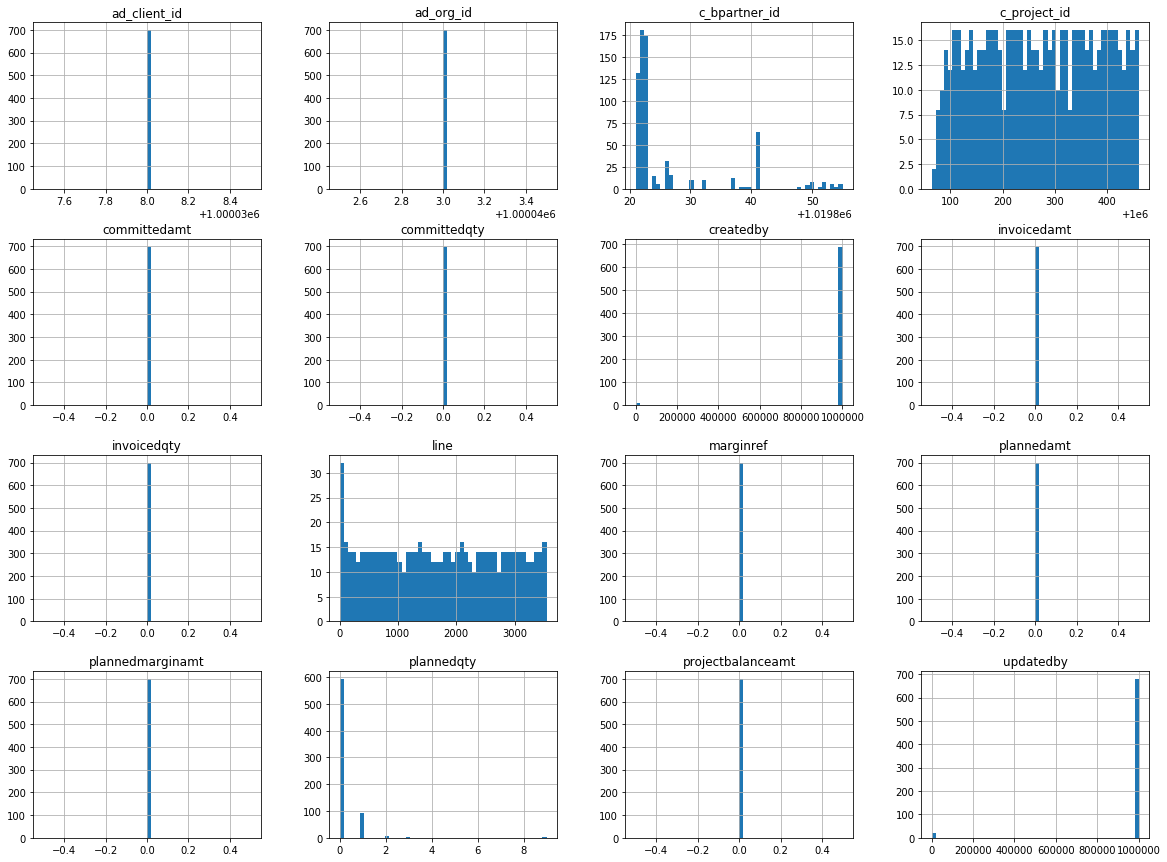

In [26]:
dfCommesse.hist(bins=50, figsize=(20,15))
plt.show()

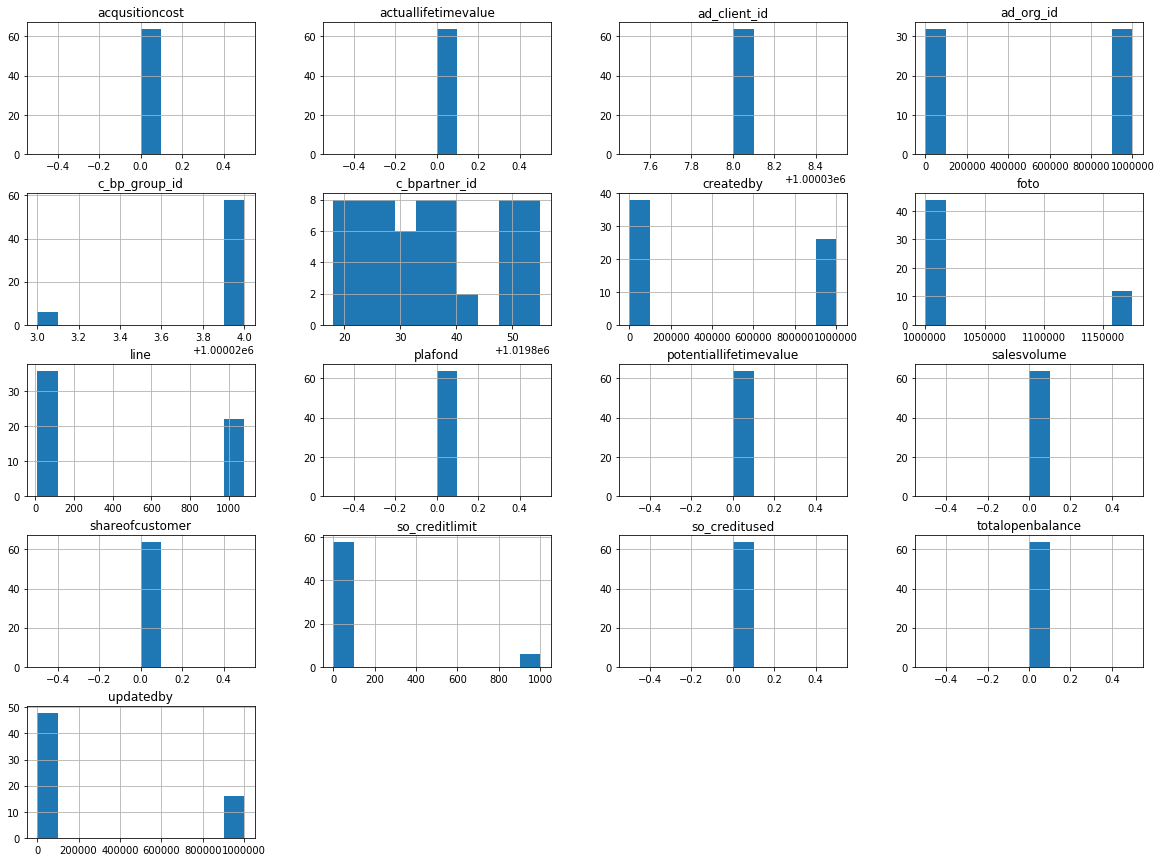

In [16]:
dfClienti.hist(bins=10, figsize=(20,15))
plt.show()

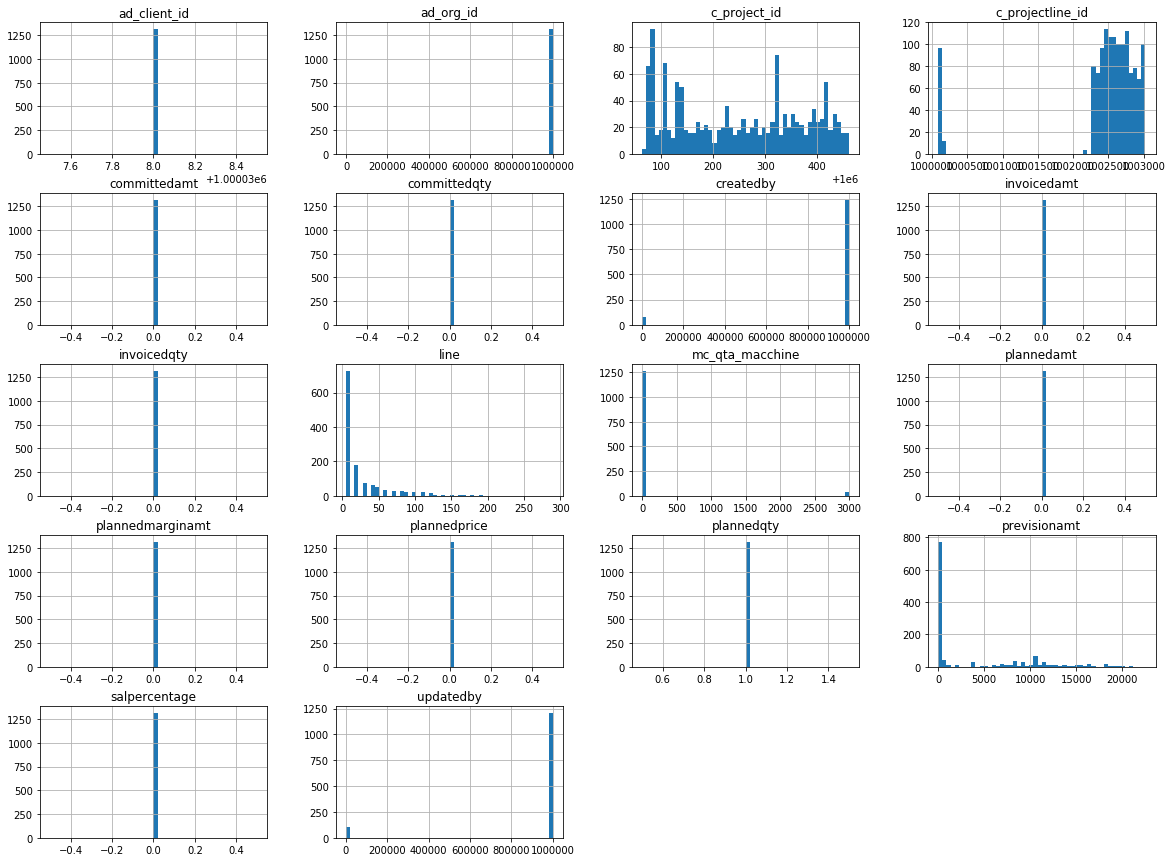

In [69]:
dfMatricole.hist(bins=50, figsize=(20,15))
plt.show()

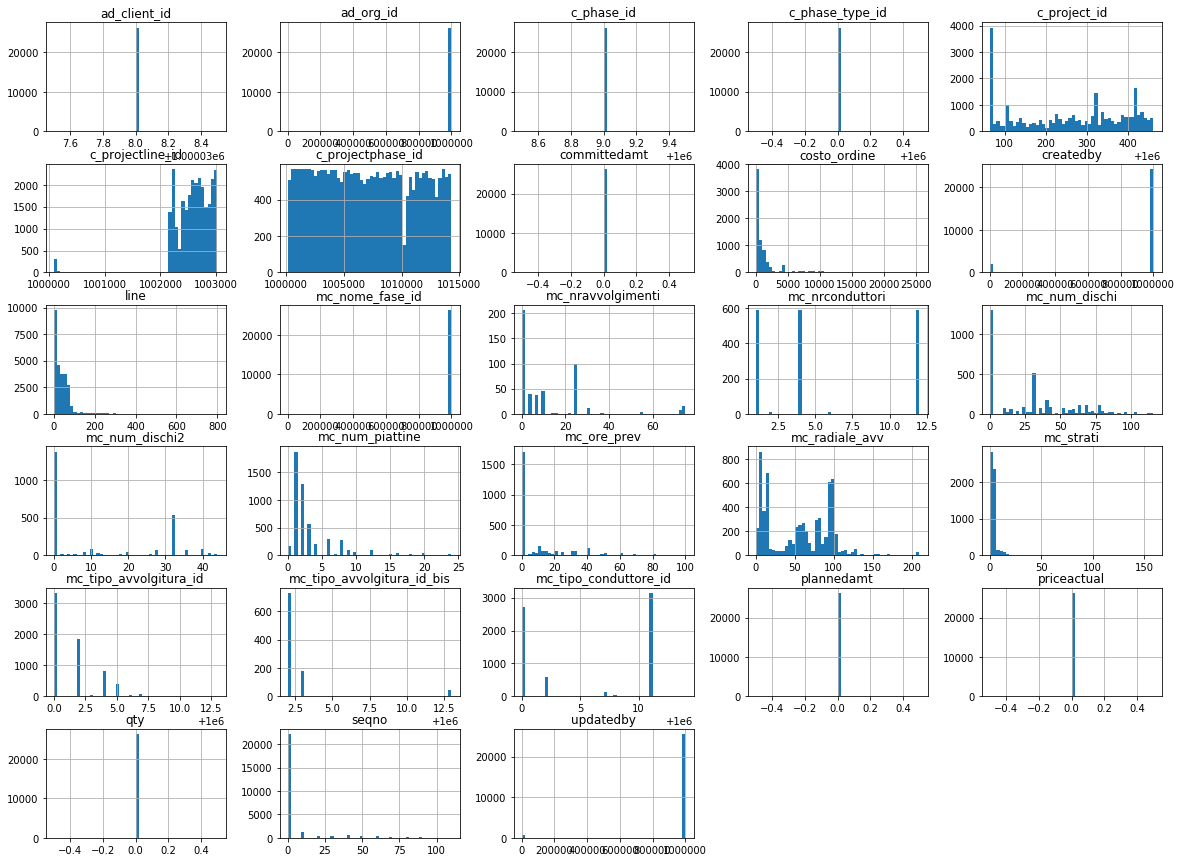

In [60]:
dfFasiLavorazione.hist(bins=50, figsize=(20,15))
plt.show()

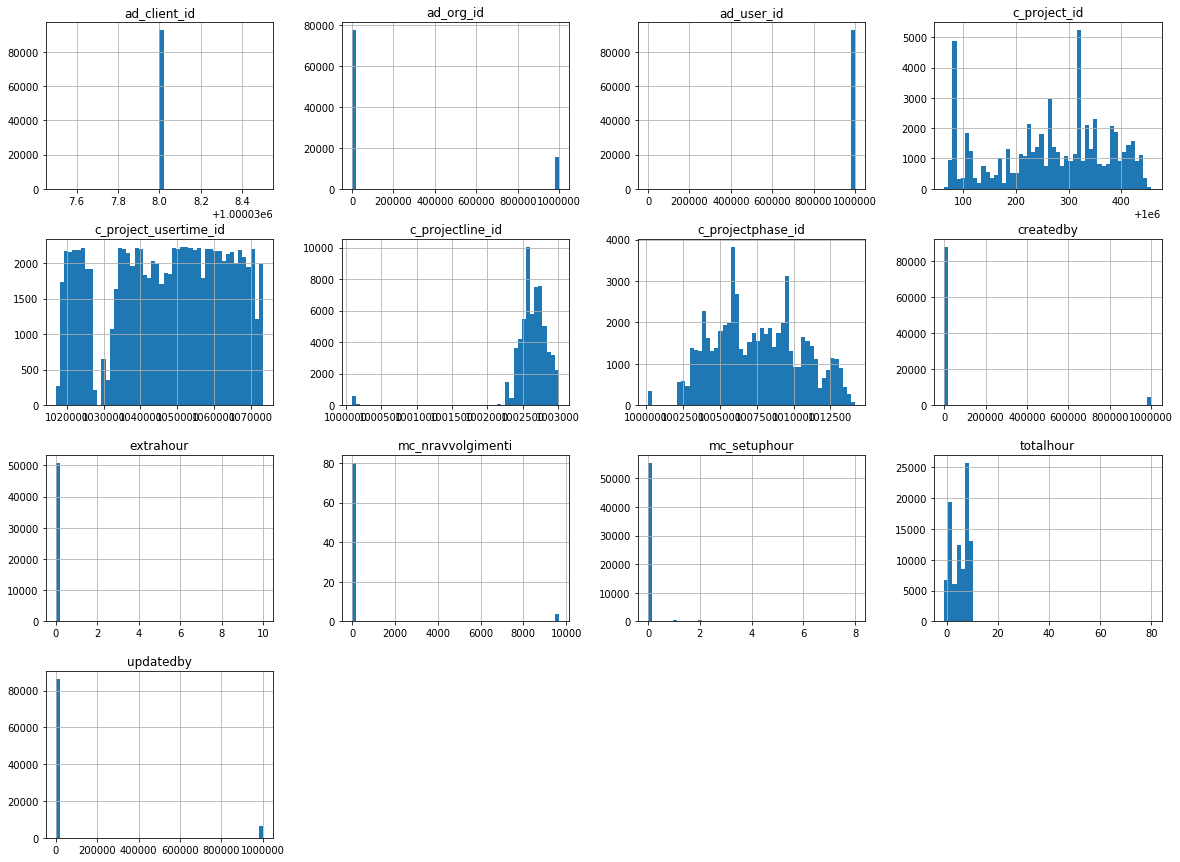

In [63]:
dfTempiLavorazione.hist(bins=50, figsize=(20,15))
plt.show()

# Check sulle commesse

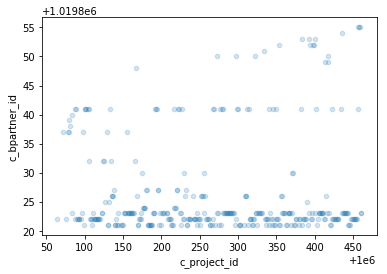

In [68]:
dfCommesse.plot(kind="scatter", x="c_project_id", y="c_bpartner_id", alpha=0.1)

# Check sui tempi di lavorazione

Text(0.5, 1.0, 'Explore corr - Progetti VS Usertime')

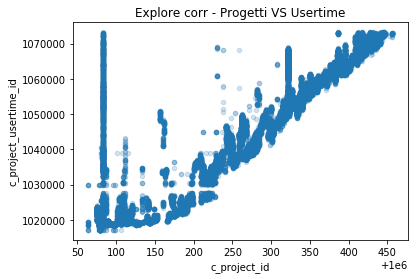

In [39]:
title = r'Explore corr - Progetti VS Usertime'
dfTempiLavorazione.plot(kind="scatter", x="c_project_id", y="c_project_usertime_id", alpha=0.1).set_title( title)

Text(0.5, 1.0, 'Explore corr - Fasi Progettuali VS Usertime')

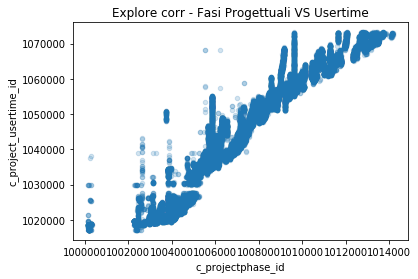

In [40]:
title = r'Explore corr - Fasi Progettuali VS Usertime'
dfTempiLavorazione.plot(kind="scatter", x="c_projectphase_id", y="c_project_usertime_id", alpha=0.1).set_title( title)

Text(0.5, 1.0, 'Explore corr - Progetti VS Fasi Progettuali')

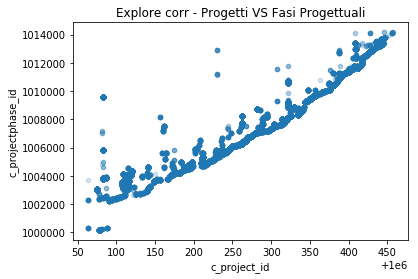

In [42]:
title = r'Explore corr - Progetti VS Fasi Progettuali'
dfTempiLavorazione.plot(kind="scatter", x="c_project_id", y="c_projectphase_id", alpha=0.1).set_title( title)

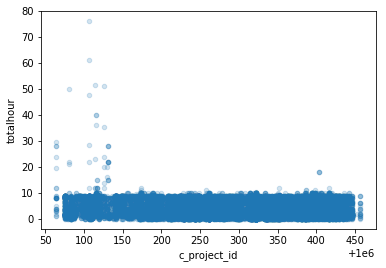

In [31]:
dfTempiLavorazione.plot(kind="scatter", x="c_project_id", y="totalhour", alpha=0.1)

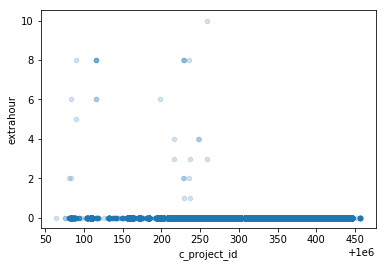

In [32]:
dfTempiLavorazione.plot(kind="scatter", x="c_project_id", y="extrahour", alpha=0.1)

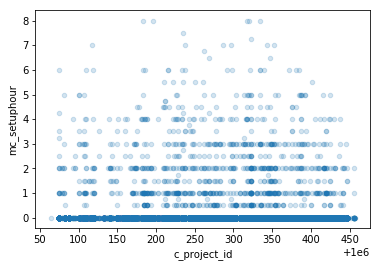

In [33]:
dfTempiLavorazione.plot(kind="scatter", x="c_project_id", y="mc_setuphour", alpha=0.1)

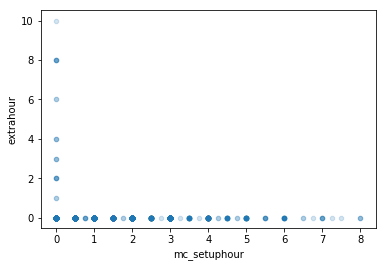

In [34]:
dfTempiLavorazione.plot(kind="scatter", x="mc_setuphour", y="extrahour", alpha=0.1)

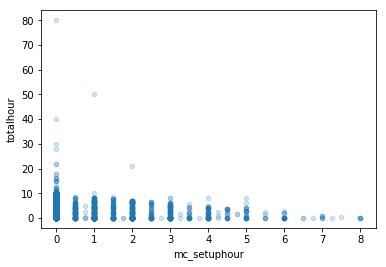

In [35]:
dfTempiLavorazione.plot(kind="scatter", x="mc_setuphour", y="totalhour", alpha=0.1)

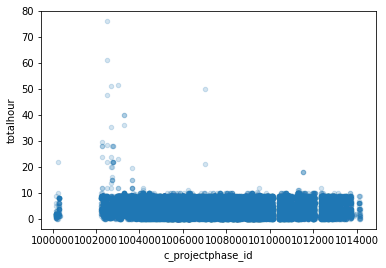

In [42]:
dfTempiLavorazione.plot(kind="scatter", x="c_projectphase_id", y="totalhour", alpha=0.1)

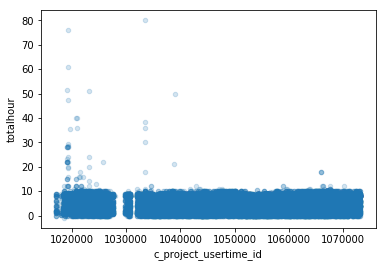

In [64]:
dfTempiLavorazione.plot(kind="scatter", x="c_project_usertime_id", y="totalhour", alpha=0.1)

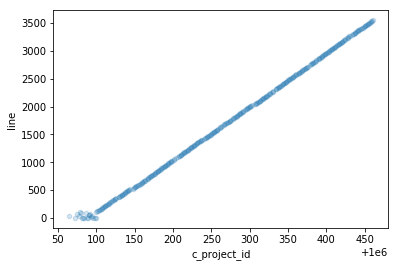

In [43]:
dfCommesse.plot(kind="scatter", x="c_project_id", y="line", alpha=0.1)

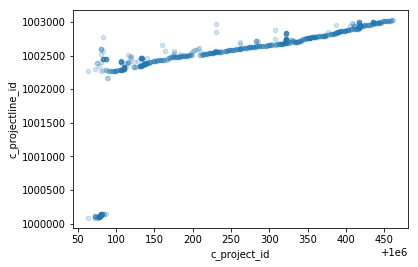

In [44]:
dfMatricole.plot(kind="scatter", x="c_project_id", y="c_projectline_id", alpha=0.1)

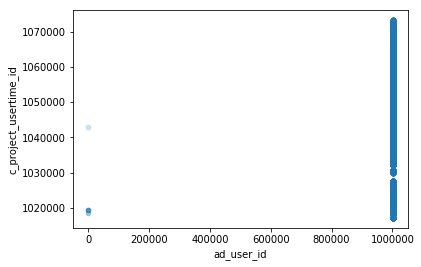

In [49]:
dfTempiLavorazione.plot(kind="scatter", x="ad_user_id", y="c_project_usertime_id", alpha=0.1)

In [57]:
len(np.unique(dfTempiLavorazione['ad_user_id'].values))

34

In [261]:
dfMatricole.corr()

,c_projectline_id,ad_client_id,ad_org_id,createdby,updatedby,c_project_id,line,plannedqty,plannedprice,plannedamt,plannedmarginamt,committedamt,invoicedamt,invoicedqty,committedqty,mc_qta_macchine,previsionamt,salpercentage
c_projectline_id,1.000000,NaN,0.006964,0.536075,0.656786,0.650991,0.067895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.577939,0.058244,NaN
ad_client_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ad_org_id,0.006964,NaN,1.000000,0.155442,0.130496,0.056895,-0.016409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.007339,0.026745,NaN
createdby,0.536075,NaN,0.155442,1.000000,0.698848,0.326481,0.022683,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.313819,0.158881,NaN
updatedby,0.656786,NaN,0.130496,0.698848,1.000000,0.385638,0.056397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.593749,0.159845,NaN
c_project_id,0.650991,NaN,0.056895,0.326481,0.385638,1.000000,-0.043510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.265474,-0.226916,NaN
line,0.067895,NaN,-0.016409,0.022683,0.056397,-0.043510,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.085772,-0.276393,NaN
plannedqty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
plannedprice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
plannedamt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [262]:
dfMatricole['mc_qta_macchine']

0          1.0
1          1.0
2          1.0
3          1.0
4          1.0
5          1.0
6          1.0
7          1.0
8          1.0
9          1.0
10         1.0
11         1.0
12         0.0
13         1.0
14         1.0
15         1.0
16         1.0
17         1.0
18         1.0
19         1.0
20         1.0
21         5.0
22      3000.0
23         1.0
24         1.0
25         1.0
26         1.0
27         1.0
28         1.0
29         1.0
         ...  
1290       1.0
1291       1.0
1292       1.0
1293       1.0
1294       1.0
1295       1.0
1296       1.0
1297       1.0
1298       1.0
1299       1.0
1300       1.0
1301       1.0
1302       1.0
1303       1.0
1304       1.0
1305       1.0
1306       1.0
1307       1.0
1308       1.0
1309       1.0
1310       1.0
1311       1.0
1312       1.0
1313       1.0
1314       1.0
1315       1.0
1316       1.0
1317       1.0
1318       1.0
1319       1.0
Name: mc_qta_macchine, Length: 1320, dtype: float64

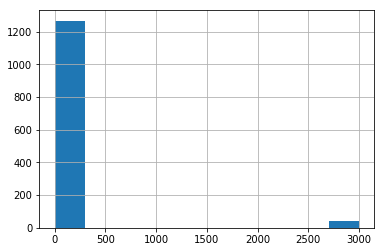

In [263]:
dfMatricole['mc_qta_macchine'].hist()

In [269]:
#let's truncate outliers, std : 2 > 95%
q = dfMatricole["mc_qta_macchine"].quantile(0.95)

# filter and correlation matrix > Improvement on correlations quota macchine <> clienti
dfMatricole[dfMatricole["mc_qta_macchine"] < q].corr()


,c_projectline_id,ad_client_id,ad_org_id,createdby,updatedby,c_project_id,line,plannedqty,plannedprice,plannedamt,plannedmarginamt,committedamt,invoicedamt,invoicedqty,committedqty,mc_qta_macchine,previsionamt,salpercentage
c_projectline_id,1.000000,NaN,0.016751,0.506684,0.455311,0.641210,0.006611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.707260,-0.010962,NaN
ad_client_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ad_org_id,0.016751,NaN,1.000000,0.192134,0.181468,0.063639,-0.015597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009244,0.027929,NaN
createdby,0.506684,NaN,0.192134,1.000000,0.753984,0.285780,-0.004157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.560066,0.131968,NaN
updatedby,0.455311,NaN,0.181468,0.753984,1.000000,0.290348,0.001258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.491911,0.100935,NaN
c_project_id,0.641210,NaN,0.063639,0.285780,0.290348,1.000000,-0.080326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.274682,-0.253705,NaN
line,0.006611,NaN,-0.015597,-0.004157,0.001258,-0.080326,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.015805,-0.293360,NaN
plannedqty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
plannedprice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
plannedamt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [282]:
dfTempiLavorazione.corr()

,c_project_usertime_id,ad_client_id,ad_org_id,updatedby,createdby,totalhour,extrahour,c_project_id,c_projectline_id,c_projectphase_id,ad_user_id,mc_nravvolgimenti,mc_setuphour
c_project_usertime_id,1.000000,NaN,-0.640286,-0.232733,-0.256588,-0.031904,-0.049726,0.815400,0.653179,0.958777,0.022353,-0.193664,-0.040162
ad_client_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ad_org_id,-0.640286,NaN,1.000000,0.432246,0.508357,0.073677,0.163792,-0.555920,-0.486732,-0.579167,-0.031291,0.000335,0.050685
updatedby,-0.232733,NaN,0.432246,1.000000,0.821054,0.079842,0.082675,-0.245697,-0.176904,-0.270509,-0.050849,-0.258688,0.027634
createdby,-0.256588,NaN,0.508357,0.821054,1.000000,0.093458,0.152392,-0.270154,-0.196305,-0.294434,-0.061481,-0.082270,0.035051
totalhour,-0.031904,NaN,0.073677,0.079842,0.093458,1.000000,0.028696,0.044661,-0.026012,-0.029003,-0.107721,-0.178913,-0.097416
extrahour,-0.049726,NaN,0.163792,0.082675,0.152392,0.028696,1.000000,-0.038041,-0.048956,-0.045408,0.010714,NaN,-0.003661
c_project_id,0.815400,NaN,-0.555920,-0.245697,-0.270154,0.044661,-0.038041,1.000000,0.619724,0.868880,0.025516,-0.299501,-0.002070
c_projectline_id,0.653179,NaN,-0.486732,-0.176904,-0.196305,-0.026012,-0.048956,0.619724,1.000000,0.699725,0.018953,-0.542780,-0.039159
c_projectphase_id,0.958777,NaN,-0.579167,-0.270509,-0.294434,-0.029003,-0.045408,0.868880,0.699725,1.000000,0.028334,-0.427562,-0.024384


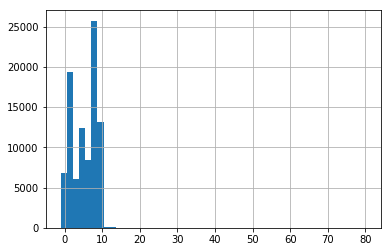

In [280]:
dfTempiLavorazione['totalhour'].hist(bins=50)

In [281]:
#let's truncate outliers, std : 2 > 95%
q = dfTempiLavorazione["totalhour"].quantile(0.95)

# filter and correlation matrix > Nessuna Correlazoine progetto_id <> tempo totale ? 
# c'è però con project_usertime
dfTempiLavorazione[dfTempiLavorazione["totalhour"] < q].corr()

,c_project_usertime_id,ad_client_id,ad_org_id,updatedby,createdby,totalhour,extrahour,c_project_id,c_projectline_id,c_projectphase_id,ad_user_id,mc_nravvolgimenti,mc_setuphour
c_project_usertime_id,1.000000,NaN,-0.616084,-0.232963,-0.258190,-0.011211,-0.047027,0.798394,0.684212,0.957058,0.013410,-0.186264,-0.040802
ad_client_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ad_org_id,-0.616084,NaN,1.000000,0.435385,0.519557,0.013113,0.143379,-0.525413,-0.480171,-0.553374,-0.017307,0.012764,0.050703
updatedby,-0.232963,NaN,0.435385,1.000000,0.808398,0.044940,0.080972,-0.228884,-0.193260,-0.258862,-0.027036,-0.248953,0.023253
createdby,-0.258190,NaN,0.519557,0.808398,1.000000,0.055936,0.158714,-0.253163,-0.213444,-0.282976,-0.033190,-0.055671,0.021875
totalhour,-0.011211,NaN,0.013113,0.044940,0.055936,1.000000,0.031158,0.073684,-0.001695,-0.007479,0.001626,-0.210252,-0.091886
extrahour,-0.047027,NaN,0.143379,0.080972,0.158714,0.031158,1.000000,-0.034514,-0.039241,-0.041376,0.008474,NaN,-0.003647
c_project_id,0.798394,NaN,-0.525413,-0.228884,-0.253163,0.073684,-0.034514,1.000000,0.638299,0.857426,0.014496,-0.317157,0.001033
c_projectline_id,0.684212,NaN,-0.480171,-0.193260,-0.213444,-0.001695,-0.039241,0.638299,1.000000,0.724825,0.011967,-0.540716,-0.036694
c_projectphase_id,0.957058,NaN,-0.553374,-0.258862,-0.282976,-0.007479,-0.041376,0.857426,0.724825,1.000000,0.015857,-0.462728,-0.023508


# Search for possible correlations between tables

## Commesse VS Clienti (chi chiede cosa)

In [44]:
dfCommesseOnClienti = psql.read_sql("""SELECT * FROM adempiere.c_project
INNER JOIN adempiere.c_bpartner ON adempiere.c_project.c_bpartner_id = adempiere.c_bpartner.c_bpartner_id
""", connection)

In [45]:
dfCommesseOnClienti.describe()

,c_project_id,ad_client_id,ad_org_id,createdby,updatedby,c_bpartner_id,plannedamt,plannedqty,plannedmarginamt,committedamt,...,acqusitioncost,potentiallifetimevalue,actuallifetimevalue,shareofcustomer,so_creditlimit,so_creditused,totalopenbalance,foto,line,plafond
count,1.388000e+03,1388.0,1388.0,1.388000e+03,1.388000e+03,1.388000e+03,1388.0,1388.000000,1388.0,1388.0,...,1388.0,1388.0,1388.0,1388.0,1388.000000,1388.0,1388.0,1.376000e+03,1388.000000,1388.0
mean,1.000271e+06,1000038.0,1000043.0,9.893250e+05,9.749029e+05,1.019826e+06,0.0,0.195965,0.0,0.0,...,0.0,0.0,0.0,0.0,700.296830,0.0,0.0,1.007384e+06,138.484150,0.0
std,1.116446e+02,0.0,0.0,1.068648e+05,1.591242e+05,8.524698e+00,0.0,0.645933,0.0,0.0,...,0.0,0.0,0.0,0.0,458.283599,0.0,0.0,3.389518e+04,260.745272,0.0
min,1.000064e+06,1000038.0,1000043.0,1.000000e+02,1.000000e+02,1.019821e+06,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.000111e+06,10.000000,0.0
25%,1.000175e+06,1000038.0,1000043.0,1.000853e+06,1.000853e+06,1.019822e+06,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.000120e+06,41.000000,0.0
50%,1.000270e+06,1000038.0,1000043.0,1.000853e+06,1.000853e+06,1.019823e+06,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,1000.000000,0.0,0.0,1.000125e+06,51.000000,0.0
75%,1.000368e+06,1000038.0,1000043.0,1.000853e+06,1.000853e+06,1.019826e+06,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,1000.000000,0.0,0.0,1.000134e+06,91.000000,0.0
max,1.000461e+06,1000038.0,1000043.0,1.000893e+06,1.000893e+06,1.019855e+06,0.0,9.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,1000.000000,0.0,0.0,1.174461e+06,1079.000000,0.0


Text(0.5, 1.0, 'Explore corr - Progetti VS Limite di Credito')

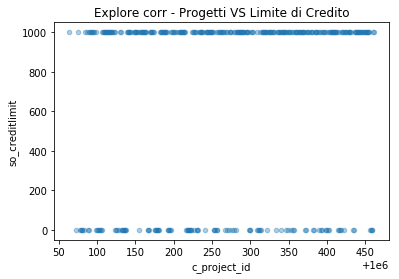

In [47]:
# two clusters
title = r'Explore corr - Progetti VS Limite di Credito'
dfCommesseOnClienti.plot(kind="scatter", x="c_project_id", y="so_creditlimit", alpha=0.1).set_title(title)

## Clienti VS Fasi lavorazione

In [48]:
dfClientiOnFasiLavorazione = psql.read_sql("""SELECT * FROM adempiere.c_bpartner clienti
JOIN adempiere.c_project progetti ON clienti.c_bpartner_id = progetti.c_bpartner_id
JOIN adempiere.c_projectphase fasi_lavorazione ON fasi_lavorazione.c_project_id = progetti.c_project_id
""", connection)

In [49]:
dfClientiOnFasiLavorazione.describe()

,c_bpartner_id,ad_client_id,ad_org_id,createdby,updatedby,c_bp_group_id,salesvolume,acqusitioncost,potentiallifetimevalue,actuallifetimevalue,...,c_projectline_id,mc_nome_fase_id,mc_num_dischi2,mc_radiale_avv,mc_nrconduttori,mc_nravvolgimenti,line,mc_ore_prev,costo_ordine,c_phase_type_id
count,1.047200e+05,104720.0,1.047200e+05,1.047200e+05,1.047200e+05,104720.0,104720.0,104720.0,104720.0,104720.0,...,1.046880e+05,1.047200e+05,9832.000000,25024.000000,7152.000000,1856.000000,104720.000000,10840.000000,30048.000000,104520.0
mean,1.019828e+06,1000038.0,2.301092e+05,2.303727e+05,5.583341e+04,1000024.0,0.0,0.0,0.0,0.0,...,1.002582e+06,9.998080e+05,12.260374,55.387596,5.644295,12.362069,36.466081,9.683306,1613.274278,1000000.0
std,1.076319e+01,0.0,4.209163e+05,4.212154e+05,2.294990e+05,0.0,0.0,0.0,0.0,0.0,...,3.843138e+02,1.513773e+04,15.387701,39.553773,4.621654,18.217919,41.352205,16.555817,3073.503941,0.0
min,1.019821e+06,1000038.0,0.000000e+00,1.000000e+02,1.000000e+02,1000024.0,0.0,0.0,0.0,0.0,...,1.000084e+06,0.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1000000.0
25%,1.019822e+06,1000038.0,0.000000e+00,1.000000e+02,1.000000e+02,1000024.0,0.0,0.0,0.0,0.0,...,1.002408e+06,1.000008e+06,0.000000,13.500000,1.000000,0.000000,10.000000,0.000000,0.000000,1000000.0
50%,1.019822e+06,1000038.0,0.000000e+00,1.000000e+02,1.000000e+02,1000024.0,0.0,0.0,0.0,0.0,...,1.002624e+06,1.000026e+06,0.000000,59.500000,4.000000,3.000000,30.000000,0.000000,500.000000,1000000.0
75%,1.019830e+06,1000038.0,0.000000e+00,1.000000e+02,1.000000e+02,1000024.0,0.0,0.0,0.0,0.0,...,1.002834e+06,1.000053e+06,32.000000,92.500000,12.000000,24.000000,52.000000,14.500000,1400.000000,1000000.0
max,1.019855e+06,1000038.0,1.000043e+06,1.000893e+06,1.000893e+06,1000024.0,0.0,0.0,0.0,0.0,...,1.003024e+06,1.000197e+06,44.000000,210.000000,12.000000,75.000000,800.000000,100.000000,25600.000000,1000000.0


In [53]:
# remove duplicated columsn > TODO check SQL Join || pandas merge / group_by to handle better
dfClientiOnFasiLavorazione = dfClientiOnFasiLavorazione.loc[:, ~dfClientiOnFasiLavorazione.columns.duplicated()]

Text(0.5, 1.0, 'Explore corr - Clienti VS Costo Ordine')

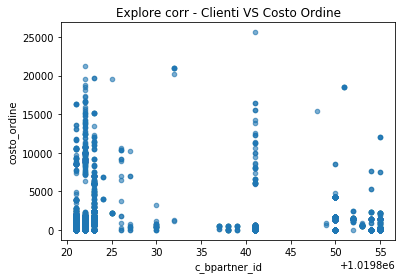

In [54]:
# some clusters here
title = r'Explore corr - Clienti VS Costo Ordine'
dfClientiOnFasiLavorazione.plot(kind="scatter", x="c_bpartner_id", y="costo_ordine", alpha=0.1).set_title(title)

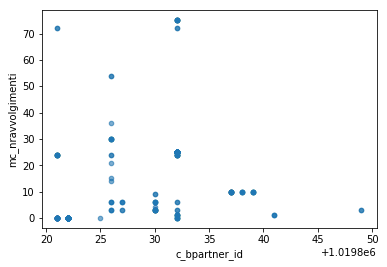

In [112]:
title = r'Explore corr - Clienti VS Costo Ordine'
dfClientiOnFasiLavorazione.plot(kind="scatter", x="c_bpartner_id", y="mc_nravvolgimenti", alpha=0.1).set_title(title)

Text(0.5, 1.0, 'Explore corr - Clienti VS Ore Previste')

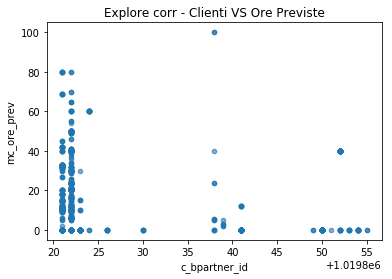

In [56]:
title = r'Explore corr - Clienti VS Ore Previste'
dfClientiOnFasiLavorazione.plot(kind="scatter", x="c_bpartner_id", y="mc_ore_prev", alpha=0.1).set_title(title)

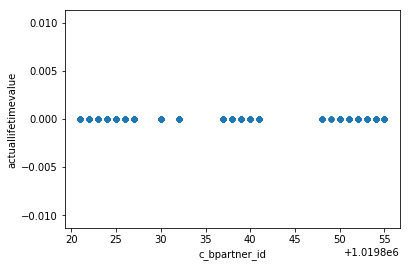

In [114]:
dfClientiOnFasiLavorazione.plot(kind="scatter", x="c_bpartner_id", y="actuallifetimevalue", alpha=0.1)

## Clienti VS Tempi lavorazione 

In [73]:
dfClientiOnTempiLavorazione = psql.read_sql("""SELECT * FROM adempiere.c_bpartner clienti
INNER JOIN adempiere.c_project progetti ON clienti.c_bpartner_id = progetti.c_bpartner_id
INNER JOIN adempiere.c_project_usertime tempi_lavorazione ON tempi_lavorazione.c_project_id = progetti.c_project_id
""", connection)

In [74]:
list(dfClientiOnTempiLavorazione)

['c_bpartner_id',
 'ad_client_id',
 'ad_org_id',
 'isactive',
 'created',
 'createdby',
 'updated',
 'updatedby',
 'value',
 'name',
 'name2',
 'description',
 'issummary',
 'c_bp_group_id',
 'isonetime',
 'isprospect',
 'isvendor',
 'iscustomer',
 'isemployee',
 'issalesrep',
 'referenceno',
 'duns',
 'url',
 'ad_language',
 'taxid',
 'istaxexempt',
 'c_invoiceschedule_id',
 'rating',
 'salesvolume',
 'numberemployees',
 'naics',
 'firstsale',
 'acqusitioncost',
 'potentiallifetimevalue',
 'actuallifetimevalue',
 'shareofcustomer',
 'paymentrule',
 'so_creditlimit',
 'so_creditused',
 'c_paymentterm_id',
 'm_pricelist_id',
 'm_discountschema_id',
 'c_dunning_id',
 'isdiscountprinted',
 'so_description',
 'poreference',
 'paymentrulepo',
 'po_pricelist_id',
 'po_discountschema_id',
 'po_paymentterm_id',
 'documentcopies',
 'c_greeting_id',
 'invoicerule',
 'deliveryrule',
 'freightcostrule',
 'deliveryviarule',
 'salesrep_id',
 'sendemail',
 'bpartner_parent_id',
 'invoice_printformat_

In [75]:
# remove duplicated columsn > TODO check SQL Join || pandas merge / group_by to handle better
dfClientiOnTempiLavorazione = dfClientiOnTempiLavorazione.loc[:, ~dfClientiOnTempiLavorazione.columns.duplicated()]

In [76]:
dfClientiOnTempiLavorazione.corr().sort_values(by=['c_bpartner_id','c_project_usertime_id'], ascending = False)

,c_bpartner_id,ad_client_id,ad_org_id,createdby,updatedby,c_bp_group_id,salesvolume,acqusitioncost,potentiallifetimevalue,actuallifetimevalue,...,invoicedqty,projectbalanceamt,marginref,c_project_usertime_id,totalhour,extrahour,c_projectline_id,c_projectphase_id,mc_nravvolgimenti,mc_setuphour
c_bpartner_id,1.000000,NaN,0.961180,0.961181,0.400963,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.176571,-0.087647,-0.012699,0.049308,0.135121,0.189648,-0.014724
createdby,0.961181,NaN,1.000000,1.000000,0.267620,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.113862,-0.118012,-0.011304,-0.022018,0.061213,0.308531,-0.018336
ad_org_id,0.961180,NaN,1.000000,1.000000,0.267619,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.113862,-0.118012,-0.011304,-0.022018,0.061213,0.308531,-0.018336
line,0.735238,NaN,0.562745,0.562745,0.505813,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.230525,0.009569,-0.010444,0.011982,0.209840,0.450800,0.010310
foto,0.726940,NaN,0.537657,0.537657,0.480811,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.278967,0.002592,-0.010568,0.161812,0.257718,-0.054893,0.001129
updatedby,0.400963,NaN,0.267619,0.267620,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.088688,0.007555,-0.006286,0.085285,0.127249,-0.068973,0.009015
plannedqty,0.305077,NaN,0.281047,0.281047,0.063612,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.203043,-0.040465,-0.003622,0.071283,0.191432,0.210820,-0.009444
mc_nravvolgimenti,0.189648,NaN,0.308531,0.308531,-0.068973,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.195337,-0.171234,NaN,-0.542780,-0.427562,1.000000,-0.140463
c_project_usertime_id,0.176571,NaN,0.113862,0.113862,0.088688,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.000000,-0.065845,-0.050077,0.653007,0.958776,-0.195337,-0.040651
c_projectphase_id,0.135121,NaN,0.061213,0.061213,0.127249,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.958776,-0.028261,-0.045412,0.699578,1.000000,-0.427562,-0.024402


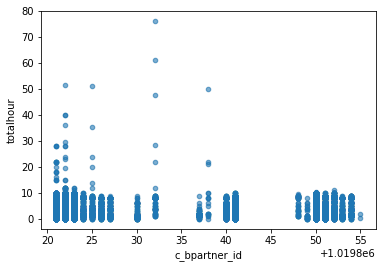

In [63]:
title = r'Explore corr - Cliente VS Ore Totali'

dfClientiOnTempiLavorazione.plot(kind="scatter", x="c_bpartner_id", y="totalhour", alpha=0.1)

Text(0.5, 1.0, 'Explore Corr - Cliente VS Ore Extra')

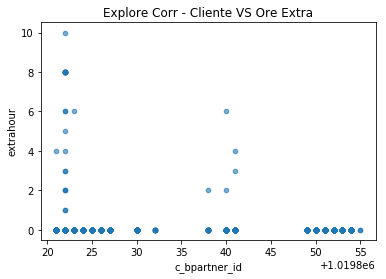

In [64]:
title = r'Explore Corr - Cliente VS Ore Extra'
dfClientiOnTempiLavorazione.plot(kind="scatter", x="c_bpartner_id", y="extrahour", alpha=0.1).set_title(title)

Text(0.5, 1.0, 'Explore Corr - Cliente VS Ore di Setup')

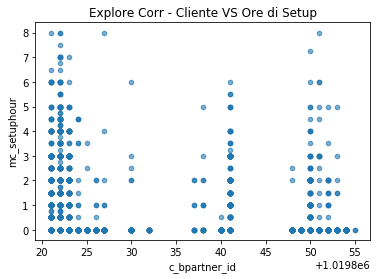

In [65]:
title = r'Explore Corr - Cliente VS Ore di Setup'
dfClientiOnTempiLavorazione.plot(kind="scatter", x="c_bpartner_id", y="mc_setuphour", alpha=0.1).set_title(title)

Text(0.5, 1.0, 'Explore Corr - Cliente VS Fasi Progettuali')

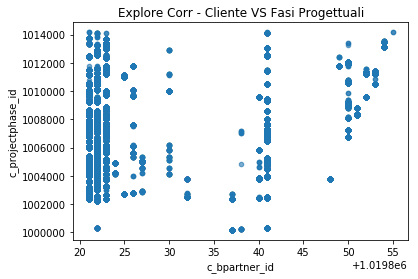

In [67]:
title = r'Explore Corr - Cliente VS Fasi Progettuali'
dfClientiOnTempiLavorazione.plot(kind="scatter", x="c_bpartner_id", y="c_projectphase_id", alpha=0.1).set_title(title)

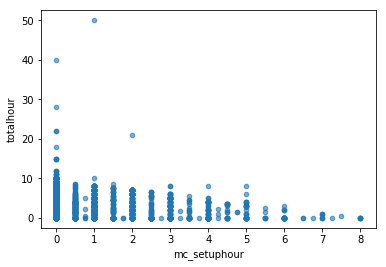

In [128]:
dfClientiOnTempiLavorazione.plot(kind="scatter", x="mc_setuphour", y="totalhour", alpha=0.1)

### Let's look at coorrelations

In [77]:
from pandas.plotting import scatter_matrix

In [78]:
dfClientiOnTempiLavorazione[dfClientiOnTempiLavorazione["mc_setuphour"] > 0.]
len(_)

33

/Users/gg4u/Sites/miniconda3/envs/chiron/lib/python3.7/site-packages/pandas/plotting/_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1000038.0, right=1000038.0
  ax.set_xlim(boundaries_list[j])
/Users/gg4u/Sites/miniconda3/envs/chiron/lib/python3.7/site-packages/pandas/plotting/_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1000038.0, top=1000038.0
  ax.set_ylim(boundaries_list[i])
/Users/gg4u/Sites/miniconda3/envs/chiron/lib/python3.7/site-packages/pandas/plotting/_misc.py:100: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1000038.0, right=1000038.0
  ax.set_xlim(boundaries_list[i])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x146e68390>,
      dtype=object)

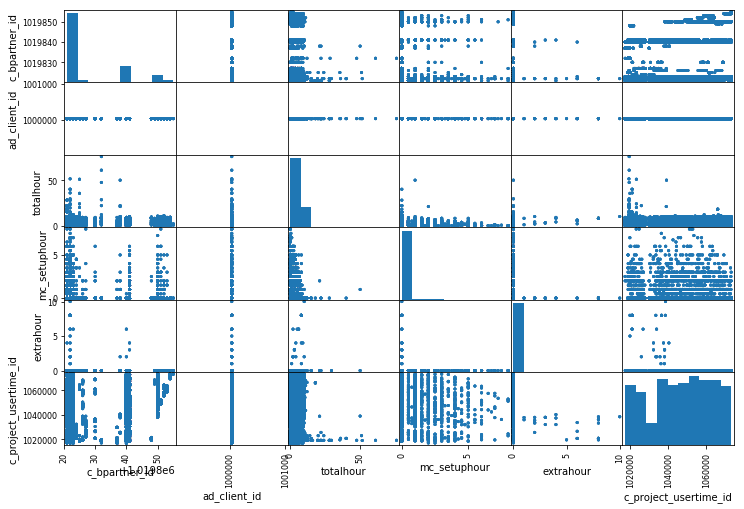

In [79]:
attributes = ["c_bpartner_id", "c_project_id", "ad_client_id",
              "totalhour", "mc_setuphour", "extrahour","c_project_usertime_id","work_category",
             "c_city_id","numberemployees"]

scatter_matrix(dfClientiOnTempiLavorazione[attributes], figsize=(12, 8))

/Users/gg4u/Sites/miniconda3/envs/chiron/lib/python3.7/site-packages/pandas/plotting/_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[j])
/Users/gg4u/Sites/miniconda3/envs/chiron/lib/python3.7/site-packages/pandas/plotting/_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  ax.set_ylim(boundaries_list[i])
/Users/gg4u/Sites/miniconda3/envs/chiron/lib/python3.7/site-packages/pandas/plotting/_misc.py:100: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[i])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x152cd96a0>,
      dtype=object)

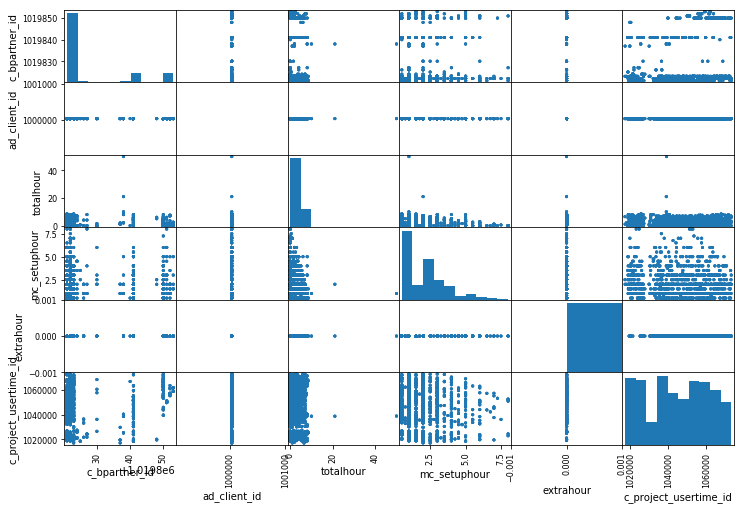

In [344]:
# let's compare when filtering out setup our:

dfTest = dfClientiOnTempiLavorazione[dfClientiOnTempiLavorazione["mc_setuphour"] > 0.]

attributes = ["c_bpartner_id", "c_project_id", "ad_client_id",
              "totalhour", "mc_setuphour", "extrahour","c_project_usertime_id","work_category",
             "c_city_id","numberemployees"]

scatter_matrix(dfTest[attributes], figsize=(12, 8))

In [342]:
#TODO normalise and standardise folders

In [140]:
# check how to merge VS join

In [147]:
dfSample = dfClientiOnTempiLavorazione[attributes]

In [148]:
corr_matrix = dfSample.corr()

In [153]:
corr_matrix["c_bpartner_id"]

c_bpartner_id            1.000000
ad_client_id                  NaN
totalhour               -0.087647
mc_setuphour            -0.014724
extrahour               -0.012699
c_project_usertime_id    0.176571
Name: c_bpartner_id, dtype: float64

## Clienti VS Operatori che partecipano a fasi lavorazione

In [80]:
dfClientiOnOperatoriLavorazione = psql.read_sql("""SELECT * FROM adempiere.c_project_id clienti
INNER JOIN adempiere.c_project progetti ON clienti.c_bpartner_id = progetti.c_bpartner_id
INNER JOIN adempiere.c_project_usertime tempi_lavorazione ON tempi_lavorazione.c_project_id = progetti.c_project_id
INNER JOIN adempiere.ad_user operatori_lavorazione ON operatori_lavorazione.ad_user_id = tempi_lavorazione.ad_user_id
""", connection)

DatabaseError: Execution failed on sql 'SELECT * FROM adempiere.c_project_id clienti
INNER JOIN adempiere.c_project progetti ON clienti.c_bpartner_id = progetti.c_bpartner_id
INNER JOIN adempiere.c_project_usertime tempi_lavorazione ON tempi_lavorazione.c_project_id = progetti.c_project_id
INNER JOIN adempiere.ad_user operatori_lavorazione ON operatori_lavorazione.ad_user_id = tempi_lavorazione.ad_user_id
': relation "adempiere.c_project_id" does not exist
LINE 1: SELECT * FROM adempiere.c_project_id clienti
                      ^


In [ ]:
dfMatricole.corr()

In [ ]:
# remove duplicated columsn > TODO check SQL Join || pandas merge / group_by to handle better
dfClientiOnOperatoriLavorazione = dfClientiOnOperatoriLavorazione.loc[:, ~dfClientiOnOperatoriLavorazione.columns.duplicated()]

In [ ]:
# ad_user_id is missing : maybe all None for clients that are related both on projects, on usertime and on operators  
dfClientiOnOperatoriLavorazione.corr().sort_values(by=['c_bpartner_id'], ascending = False)

In [177]:
dfClientiOnOperatoriLavorazione.describe()

,c_bpartner_id,ad_client_id,ad_org_id,createdby,updatedby,c_bp_group_id,salesvolume,acqusitioncost,potentiallifetimevalue,actuallifetimevalue,...,marginref,c_project_usertime_id,totalhour,extrahour,c_projectline_id,c_projectphase_id,mc_nravvolgimenti,mc_setuphour,c_job_id,standard_cost
count,4.846720e+05,484672.0,4.846720e+05,4.846720e+05,4.846720e+05,484672.0,484672.0,484672.0,484672.0,484672.0,...,484672.0,4.846720e+05,480352.000000,405344.000000,4.846720e+05,4.846560e+05,608.000000,453536.000000,2.066560e+05,484672.000000
mean,1.019828e+06,1000038.0,2.713704e+05,2.716632e+05,3.868720e+04,1000024.0,0.0,0.0,0.0,0.0,...,0.0,1.046675e+06,4.030381,0.005684,1.002632e+06,1.007554e+06,509.763158,0.076431,1.000035e+06,30.879068
std,1.019081e+01,0.0,4.446803e+05,4.449963e+05,1.926850e+05,0.0,0.0,0.0,0.0,0.0,...,0.0,1.593044e+04,3.125784,0.192746,3.039076e+02,2.937087e+03,2159.923611,0.482534,3.127360e+00,11.051715
min,1.019821e+06,1000038.0,0.000000e+00,1.000000e+02,1.000000e+02,1000024.0,0.0,0.0,0.0,0.0,...,0.0,1.017110e+06,0.000000,0.000000,1.000084e+06,1.000159e+06,0.000000,0.000000,1.000031e+06,0.000000
25%,1.019822e+06,1000038.0,0.000000e+00,1.000000e+02,1.000000e+02,1000024.0,0.0,0.0,0.0,0.0,...,0.0,1.034876e+06,1.000000,0.000000,1.002544e+06,1.005319e+06,0.000000,0.000000,1.000031e+06,25.920000
50%,1.019822e+06,1000038.0,0.000000e+00,1.000000e+02,1.000000e+02,1000024.0,0.0,0.0,0.0,0.0,...,0.0,1.048196e+06,3.500000,0.000000,1.002649e+06,1.007399e+06,0.000000,0.000000,1.000035e+06,29.440000
75%,1.019840e+06,1000038.0,1.000043e+06,1.000853e+06,1.000000e+02,1000024.0,0.0,0.0,0.0,0.0,...,0.0,1.060194e+06,7.000000,0.000000,1.002769e+06,1.009613e+06,1.000000,0.000000,1.000038e+06,31.820000
max,1.019855e+06,1000038.0,1.000043e+06,1.000893e+06,1.000893e+06,1000024.0,0.0,0.0,0.0,0.0,...,0.0,1.073167e+06,76.000000,10.000000,1.003018e+06,1.014169e+06,9666.000000,8.000000,1.000039e+06,80.000000


In [195]:
# TODO > why this ?
dfClientiOnOperatoriLavorazione[dfClientiOnOperatoriLavorazione['ad_user_id'] != None]['ad_user_id'];

In [202]:
# NOTA: Ci sono solo 2 records dei clienti nella tabella degli operatori ad_user > non trovo correlazione
dfTempiLavorazione.corr()

,c_project_usertime_id,ad_client_id,ad_org_id,updatedby,createdby,totalhour,extrahour,c_project_id,c_projectline_id,c_projectphase_id,ad_user_id,mc_nravvolgimenti,mc_setuphour
c_project_usertime_id,1.000000,NaN,-0.640286,-0.232733,-0.256588,-0.031904,-0.049726,0.815400,0.653179,0.958777,0.022353,-0.193664,-0.040162
ad_client_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ad_org_id,-0.640286,NaN,1.000000,0.432246,0.508357,0.073677,0.163792,-0.555920,-0.486732,-0.579167,-0.031291,0.000335,0.050685
updatedby,-0.232733,NaN,0.432246,1.000000,0.821054,0.079842,0.082675,-0.245697,-0.176904,-0.270509,-0.050849,-0.258688,0.027634
createdby,-0.256588,NaN,0.508357,0.821054,1.000000,0.093458,0.152392,-0.270154,-0.196305,-0.294434,-0.061481,-0.082270,0.035051
totalhour,-0.031904,NaN,0.073677,0.079842,0.093458,1.000000,0.028696,0.044661,-0.026012,-0.029003,-0.107721,-0.178913,-0.097416
extrahour,-0.049726,NaN,0.163792,0.082675,0.152392,0.028696,1.000000,-0.038041,-0.048956,-0.045408,0.010714,NaN,-0.003661
c_project_id,0.815400,NaN,-0.555920,-0.245697,-0.270154,0.044661,-0.038041,1.000000,0.619724,0.868880,0.025516,-0.299501,-0.002070
c_projectline_id,0.653179,NaN,-0.486732,-0.176904,-0.196305,-0.026012,-0.048956,0.619724,1.000000,0.699725,0.018953,-0.542780,-0.039159
c_projectphase_id,0.958777,NaN,-0.579167,-0.270509,-0.294434,-0.029003,-0.045408,0.868880,0.699725,1.000000,0.028334,-0.427562,-0.024384


In [204]:
dfFasiLavorazione.corr().sort_values(by=['c_project_id'])

,c_project_id,ad_client_id,ad_org_id,createdby,updatedby,priceactual,c_phase_id,c_projectphase_id,qty,seqno,...,c_projectline_id,mc_nome_fase_id,mc_num_dischi2,mc_radiale_avv,mc_nrconduttori,mc_nravvolgimenti,line,mc_ore_prev,costo_ordine,c_phase_type_id
seqno,-0.470967,NaN,-0.049908,0.061507,-0.068343,NaN,NaN,-0.453261,NaN,1.000000,...,-0.420022,0.004827,0.051599,0.001532,0.105791,-0.056285,-0.262553,0.012330,0.060934,NaN
mc_ore_prev,-0.289843,NaN,NaN,0.022883,-0.016781,NaN,NaN,-0.255739,NaN,0.012330,...,-0.190595,0.006808,0.241816,0.309250,NaN,0.048234,-0.240907,1.000000,0.068080,NaN
costo_ordine,-0.259335,NaN,NaN,0.032089,-0.004616,NaN,NaN,-0.223936,NaN,0.060934,...,-0.138524,0.011755,0.027681,0.128045,NaN,0.622067,-0.056910,0.068080,1.000000,NaN
createdby,-0.179581,NaN,0.052762,1.000000,0.426971,NaN,NaN,-0.163659,NaN,0.061507,...,-0.035889,0.052758,0.105051,-0.012051,NaN,0.026412,-0.093328,0.022883,0.032089,NaN
mc_nravvolgimenti,-0.158933,NaN,NaN,0.026412,0.034190,NaN,NaN,-0.187149,NaN,-0.056285,...,-0.037666,-0.264108,-0.545428,0.070497,NaN,1.000000,0.226331,0.048234,0.622067,NaN
mc_radiale_avv,-0.088301,NaN,NaN,-0.012051,-0.008802,NaN,NaN,-0.079533,NaN,0.001532,...,-0.065606,-0.223968,-0.090258,1.000000,-0.974456,0.070497,-0.270051,0.309250,0.128045,NaN
mc_strati,-0.049838,NaN,NaN,0.071724,-0.008640,NaN,NaN,-0.060202,NaN,0.065371,...,-0.036116,-0.137563,-0.325368,0.408265,-0.948668,-0.003855,-0.155625,-0.132998,0.012013,NaN
mc_nrconduttori,-0.041493,NaN,NaN,NaN,-0.000694,NaN,NaN,0.011094,NaN,0.105791,...,0.000618,0.321779,NaN,-0.974456,1.000000,NaN,NaN,NaN,NaN,NaN
mc_tipo_avvolgitura_id,-0.030415,NaN,NaN,0.011907,0.008799,NaN,NaN,-0.030330,NaN,0.038594,...,-0.045086,-0.003006,0.073214,-0.555232,0.962708,0.199746,0.212788,-0.143800,-0.015258,NaN
mc_num_piattine,0.000869,NaN,NaN,0.025448,0.044277,NaN,NaN,-0.000762,NaN,-0.038090,...,0.030676,-0.155184,-0.288838,-0.084712,NaN,-0.157992,0.063122,-0.135570,-0.082804,NaN


In [213]:
dfFasiLavorazione.describe()

,c_project_id,ad_client_id,ad_org_id,createdby,updatedby,priceactual,c_phase_id,c_projectphase_id,qty,seqno,...,c_projectline_id,mc_nome_fase_id,mc_num_dischi2,mc_radiale_avv,mc_nrconduttori,mc_nravvolgimenti,line,mc_ore_prev,costo_ordine,c_phase_type_id
count,2.627800e+04,26278.0,2.627800e+04,2.627800e+04,2.627800e+04,26278.0,26228.0,2.627800e+04,26278.0,26278.000000,...,2.627000e+04,2.627800e+04,2458.000000,6270.000000,1788.000000,478.00000,26278.000000,2718.000000,7526.000000,26228.0
mean,1.000258e+06,1000038.0,9.998147e+05,9.249915e+05,9.714575e+05,0.0,1000009.0,1.007073e+06,0.0,5.690692,...,1.002583e+06,9.998089e+05,12.260374,55.288485,5.644295,12.16318,36.398889,9.654805,1611.336218,1000000.0
std,1.315570e+02,0.0,1.510973e+04,2.649162e+05,1.690049e+05,0.0,0.0,4.120241e+03,0.0,16.445132,...,3.837323e+02,1.510970e+04,15.390050,39.567467,4.622623,18.00054,41.291332,16.542036,3071.136892,0.0
min,1.000064e+06,1000038.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1000009.0,1.000130e+06,0.0,0.000000,...,1.000084e+06,0.000000e+00,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,1000000.0
25%,1.000130e+06,1000038.0,1.000043e+06,1.000853e+06,1.000853e+06,0.0,1000009.0,1.003480e+06,0.0,0.000000,...,1.002408e+06,1.000008e+06,0.000000,13.500000,1.000000,0.00000,10.000000,0.000000,0.000000,1000000.0
50%,1.000273e+06,1000038.0,1.000043e+06,1.000853e+06,1.000853e+06,0.0,1000009.0,1.006970e+06,0.0,0.000000,...,1.002625e+06,1.000026e+06,0.000000,59.500000,4.000000,3.00000,30.000000,0.000000,500.000000,1000000.0
75%,1.000382e+06,1000038.0,1.000043e+06,1.000853e+06,1.000853e+06,0.0,1000009.0,1.010721e+06,0.0,0.000000,...,1.002833e+06,1.000053e+06,32.000000,92.500000,12.000000,24.00000,52.000000,13.000000,1400.000000,1000000.0
max,1.000461e+06,1000038.0,1.000043e+06,1.000893e+06,1.000893e+06,0.0,1000009.0,1.014319e+06,0.0,110.000000,...,1.003024e+06,1.000197e+06,44.000000,210.000000,12.000000,75.00000,800.000000,100.000000,25600.000000,1000000.0


## Tempi VS Fasi (di lavorazione)

In [82]:
dfTempiOnFasiLavorazione = psql.read_sql("""SELECT * FROM adempiere.c_project progetti
INNER JOIN adempiere.c_projectline matricole ON matricole.c_project_id = progetti.c_project_id
INNER JOIN adempiere.c_project_usertime tempi_lavorazione ON tempi_lavorazione.c_projectline_id = matricole.c_projectline_id
INNER JOIN adempiere.c_projectphase fasi_lavorazione ON fasi_lavorazione.c_projectphase_id = tempi_lavorazione.c_projectphase_id
""", connection)

In [83]:
# remove duplicated columsn > TODO check SQL Join || pandas merge / group_by to handle better
dfTempiOnFasiLavorazione = dfTempiOnFasiLavorazione.loc[:, ~dfTempiOnFasiLavorazione.columns.duplicated()]

In [84]:
dfTempiOnFasiLavorazione[['c_projectline_id','c_project_usertime_id']].corr().sort_values(by=['c_projectline_id','c_project_usertime_id'])

,c_projectline_id,c_project_usertime_id
c_project_usertime_id,0.656611,1.000000
c_projectline_id,1.000000,0.656611


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x237dd1cf8>,
      dtype=object)

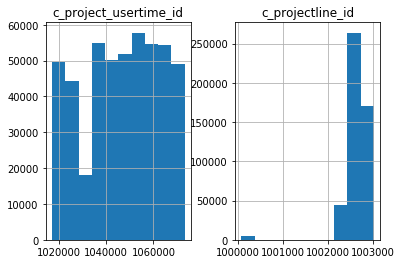

In [85]:
dfTempiOnFasiLavorazione[['c_projectline_id','c_project_usertime_id']].hist()

In [86]:
dfTempiOnFasiLavorazione[['mc_setuphour','totalhour']].corr()

,mc_setuphour,totalhour
mc_setuphour,1.000000,-0.097525
totalhour,-0.097525,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1212b65c0>,
      dtype=object)

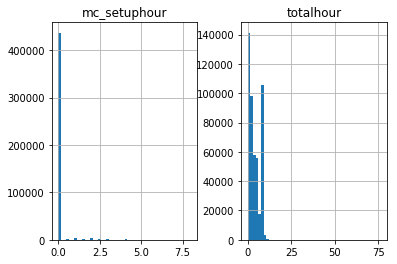

In [87]:
dfTempiOnFasiLavorazione[['mc_setuphour','totalhour']].hist(bins=50)

In [90]:
dfTempiOnFasiLavorazione[dfTempiOnFasiLavorazione["mc_setuphour"]!=0][['mc_setuphour','totalhour']].corr()

,mc_setuphour,totalhour
mc_setuphour,1.000000,-0.186386
totalhour,-0.186386,1.000000


In [95]:
len(dfTempiOnFasiLavorazione[dfTempiOnFasiLavorazione["mc_setuphour"]==0])/len(dfTempiOnFasiLavorazione[["mc_setuphour"]])

0.9018953903051116

In [338]:
# dfTempiOnFasiLavorazione.corr().dropna(axis=1, how='all')

In [101]:
# check correlations between clients and w time, w phases

# check prevision amt, c_projectline_id, totalhour

dfTest = dfTempiOnFasiLavorazione[dfTempiOnFasiLavorazione["mc_setuphour"] != 0.]

dfTest.corr().sort_values(by=['c_project_id'])['c_project_id']

previsionamt                 -0.433503
costo_ordine                 -0.408485
seqno                        -0.367067
mc_ore_prev                  -0.363528
mc_tipo_avvolgitura_id_bis   -0.337844
totalhour                    -0.264370
mc_qta_macchine              -0.237664
extrahour                    -0.203483
mc_radiale_avv               -0.054541
mc_setuphour                 -0.023146
plannedqty                    0.033003
mc_num_dischi2                0.035101
c_bpartner_id                 0.152726
createdby                     0.169868
updatedby                     0.222017
mc_nome_fase_id               0.401812
c_projectline_id              0.539810
mc_nravvolgimenti             0.713373
c_project_usertime_id         0.954052
line                          0.998238
c_project_id                  1.000000
ad_client_id                       NaN
ad_org_id                          NaN
plannedamt                         NaN
plannedmarginamt                   NaN
committedamt             

In [380]:
#attributes = ["c_bpartner_id", "mc_qta_macchine", "previsionamt","totalhour", "costo_ordine", "c_projectline_id"]
#attributes = ["mc_qta_macchine", "previsionamt","totalhour", "costo_ordine"]


# TODO. how to appluy only on selected column?
#dfTest[attributes][dfTest[attributes].apply(lambda x: np.abs(x - x.mean()) / x.std() < 3)]

#scatter_matrix(dfTest[attributes], figsize=(12, 8))

In [381]:
# filter_outlier = ['previsionamt'];


# dfTest[attributes][((dfTest[filter_outlier] - dfTest[filter_outlier].mean()) / dfTest[filter_outlier].std()).abs() < 3]

#dfTest[attributes][np.abs(dfTest[attributes]-dfTest[attributes].mean()) <= (3*dfTest[attributes].std())]

In [96]:
attributes = ["c_bpartner_id", "mc_qta_macchine", "previsionamt","totalhour", "costo_ordine"]

scatter_matrix(dfTest[attributes], figsize=(12, 8)).set_title(r'Scatter Matrix - Clienti, Qta Macchine, Previsione AMT')

NameError: name 'dfTest' is not defined

## Exploring coefficient variation for numerical column properties (not _Id)

In [97]:
import pandas as pd
dfTest = pd.DataFrame()

In [ ]:
df[np.abs(df[.Data-df.Data.mean()) <= (3*df.Data.std())]

In [251]:
dfTest.append(dfFasiLavorazione[['c_project_id','mc_ore_prev']] );

In [215]:
coefficent_variation =  lambda x: np.std(x) / np.mean(x)

In [253]:
#np.apply_along_axis(coefficent_variation, axis=0, arr=dfClientiOnOperatoriLavorazione['c_project_id'] );

In [247]:
r = dfClientiOnOperatoriLavorazione.groupby('c_bpartner_id')

In [255]:
r['mc_nravvolgimenti'].agg(coefficent_variation)

/Users/gg4u/Sites/miniconda3/envs/chiron/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.


c_bpartner_id
1019821.0    1.414214
1019822.0         NaN
1019823.0         NaN
1019824.0         NaN
1019825.0         NaN
1019826.0    0.066667
1019827.0    0.353553
1019830.0    0.404061
1019832.0         NaN
1019837.0    0.998966
1019838.0         NaN
1019840.0         NaN
1019841.0         NaN
1019848.0         NaN
1019849.0         NaN
1019850.0         NaN
1019851.0         NaN
1019852.0         NaN
1019853.0         NaN
1019854.0         NaN
1019855.0         NaN
Name: mc_nravvolgimenti, dtype: float64

In [257]:
r['mc_nravvolgimenti'].agg(np.mean)

c_bpartner_id
1019821.0       0.333333
1019822.0       0.000000
1019823.0       0.000000
1019824.0            NaN
1019825.0            NaN
1019826.0       7.500000
1019827.0       1.333333
1019830.0       2.333333
1019832.0            NaN
1019837.0    4835.500000
1019838.0       0.000000
1019840.0       0.000000
1019841.0       0.000000
1019848.0            NaN
1019849.0            NaN
1019850.0       0.000000
1019851.0            NaN
1019852.0            NaN
1019853.0            NaN
1019854.0            NaN
1019855.0            NaN
Name: mc_nravvolgimenti, dtype: float64

## TODO Improvements

- cercare correlazione fra progetti e   # fasi progettuali / # ore totali > capire quale è il campo che descrive il numero di step, oppure capire come ottenerli, per stimare costo temporale medio di ogni step

- ogni matricola, dice, riporta la data stimata di produzione > capire meglio quali campi riflettono la data stimata di produzione e quanto tempo ci mette effettivamente

- nei prodotti fatti (m_product) ci sono solo due record. Insufficienti per una statistica

- filtrare outliers per mc_setuphour, totalhour, extrahour :  correlaizoni più forti probabilmente quando c'è setup, se non c'è sono operaizoni più standard